# **Modelo Predictivo para Telecom X**

## **Preparación de los datos**

**Cargando el dataset**

In [54]:
import pandas as pd

df = pd.read_csv('datos_tratados.csv')
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


**Eliminando columnas irrelevantes**

In [55]:
columns_to_drop = ['customerID', 'Charges.Total', 'Cuentas_Diarias', 'gender']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,No,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60
1,No,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90
2,Yes,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90
3,Yes,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00
4,Yes,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15
7039,Yes,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10
7040,No,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30
7041,No,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85


**Encoding**

In [56]:
from sklearn.preprocessing import LabelEncoder

# Aplica Label Encoding a variables categóricas
le = LabelEncoder()
categorical_columns = ['Churn', 'Dependents', 'Partner', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternetService']
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col) if col.name != 'Churn' else col)
df

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,No,0,1,1,9,1,0,0,0,1,0,1,1,0,1,1,3,65.60
1,No,0,0,0,9,1,1,0,0,0,0,0,0,1,0,0,3,59.90
2,Yes,0,0,0,4,1,0,1,0,0,1,0,0,0,0,1,2,73.90
3,Yes,1,1,0,13,1,0,1,0,1,1,0,1,1,0,1,2,98.00
4,Yes,1,1,0,3,1,0,1,0,0,0,1,1,0,0,1,3,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,0,0,13,1,0,0,1,0,0,1,0,0,1,0,3,55.15
7039,Yes,0,1,0,22,1,1,1,0,0,0,0,0,1,0,1,2,85.10
7040,No,0,0,0,2,1,0,0,0,1,0,0,0,0,0,1,3,50.30
7041,No,0,1,1,67,1,0,0,1,0,1,1,0,1,2,0,3,67.85


**Proporción de Churn**

In [57]:
# Verifica si existe desbalance de clases para Churn
churn_counts = df['Churn'].value_counts()
print("Distribución de clases para Churn:")
print(churn_counts)

Distribución de clases para Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Balanceo de clases**

In [58]:
from imblearn.over_sampling import SMOTE
import numpy as np

print("=== DISTRIBUCIÓN ANTES DEL BALANCEO ===")
print("Distribución original de Churn:")
print(df['Churn'].value_counts())

feature_columns = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[feature_columns]

y = (df['Churn'] == 'Yes').astype(int)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("\n=== DISTRIBUCIÓN DESPUÉS DEL BALANCEO ===")
unique, counts = np.unique(y_balanced, return_counts=True)
for val, count in zip(unique, counts):
    clase = "No Churn" if val == 0 else "Churn"
    print(f"  {clase} ({val}): {count} muestras")

=== DISTRIBUCIÓN ANTES DEL BALANCEO ===
Distribución original de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

=== DISTRIBUCIÓN DESPUÉS DEL BALANCEO ===
  No Churn (0): 5174 muestras
  Churn (1): 5174 muestras


## **Correlación y Selección de variables**

**Matriz de correlación**

=== MATRIZ DE CORRELACIÓN ===
Variables incluidas en la correlación: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Churn_numeric']



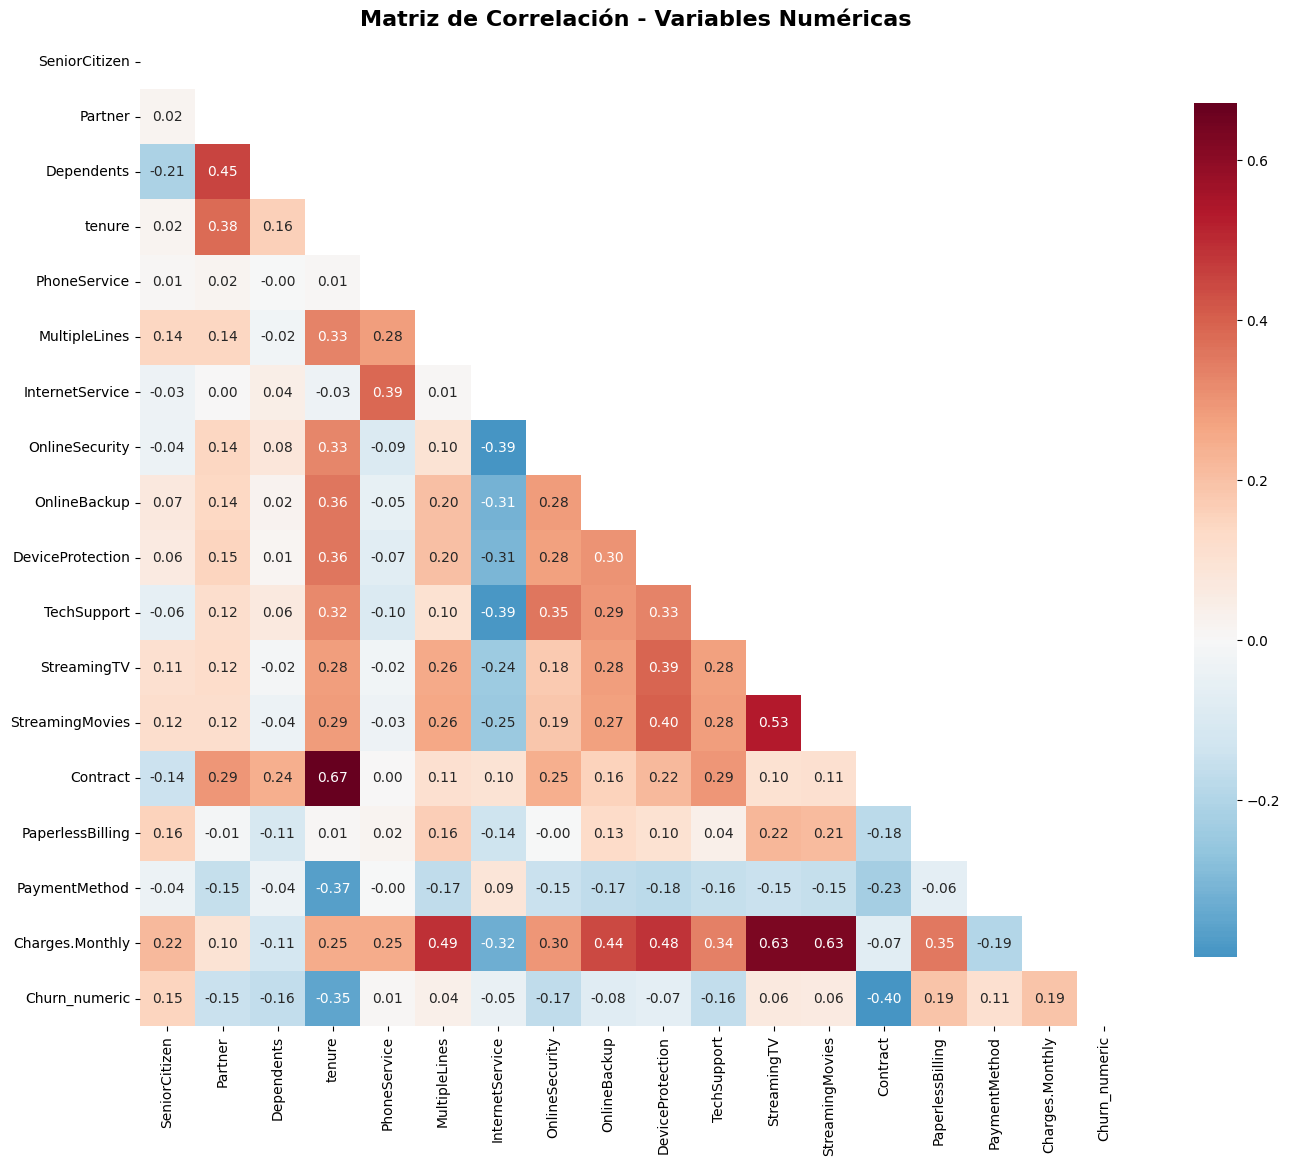

=== CORRELACIONES CON CHURN ===
Variables ordenadas por correlación absoluta con Churn:
Contract            : 0.397
tenure              : 0.352
Charges.Monthly     : 0.193
PaperlessBilling    : 0.192
OnlineSecurity      : 0.171
TechSupport         : 0.165
Dependents          : 0.164
SeniorCitizen       : 0.151
Partner             : 0.150
PaymentMethod       : 0.107
OnlineBackup        : 0.082
DeviceProtection    : 0.066
StreamingTV         : 0.063
StreamingMovies     : 0.061
InternetService     : 0.047
MultipleLines       : 0.040
PhoneService        : 0.012


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])

# Codificar la variable Churn para incluirla en la correlación
df_numeric['Churn_numeric'] = (df['Churn'] == 'Yes').astype(int)

print("=== MATRIZ DE CORRELACIÓN ===")
print(f"Variables incluidas en la correlación: {df_numeric.columns.tolist()}")
print()

correlation_matrix = df_numeric.corr()

# Crear la visualización de la matriz de correlación
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlaciones con la variable objetivo (Churn)
print("=== CORRELACIONES CON CHURN ===")
churn_correlations = correlation_matrix['Churn_numeric'].abs().sort_values(ascending=False)
print("Variables ordenadas por correlación absoluta con Churn:")
for var, corr in churn_correlations.items():
    if var != 'Churn_numeric':
        print(f"{var:<20}: {corr:.3f}")